Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [2]:
# uncomment the code below and execute this cell
library('tidyverse')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [3]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

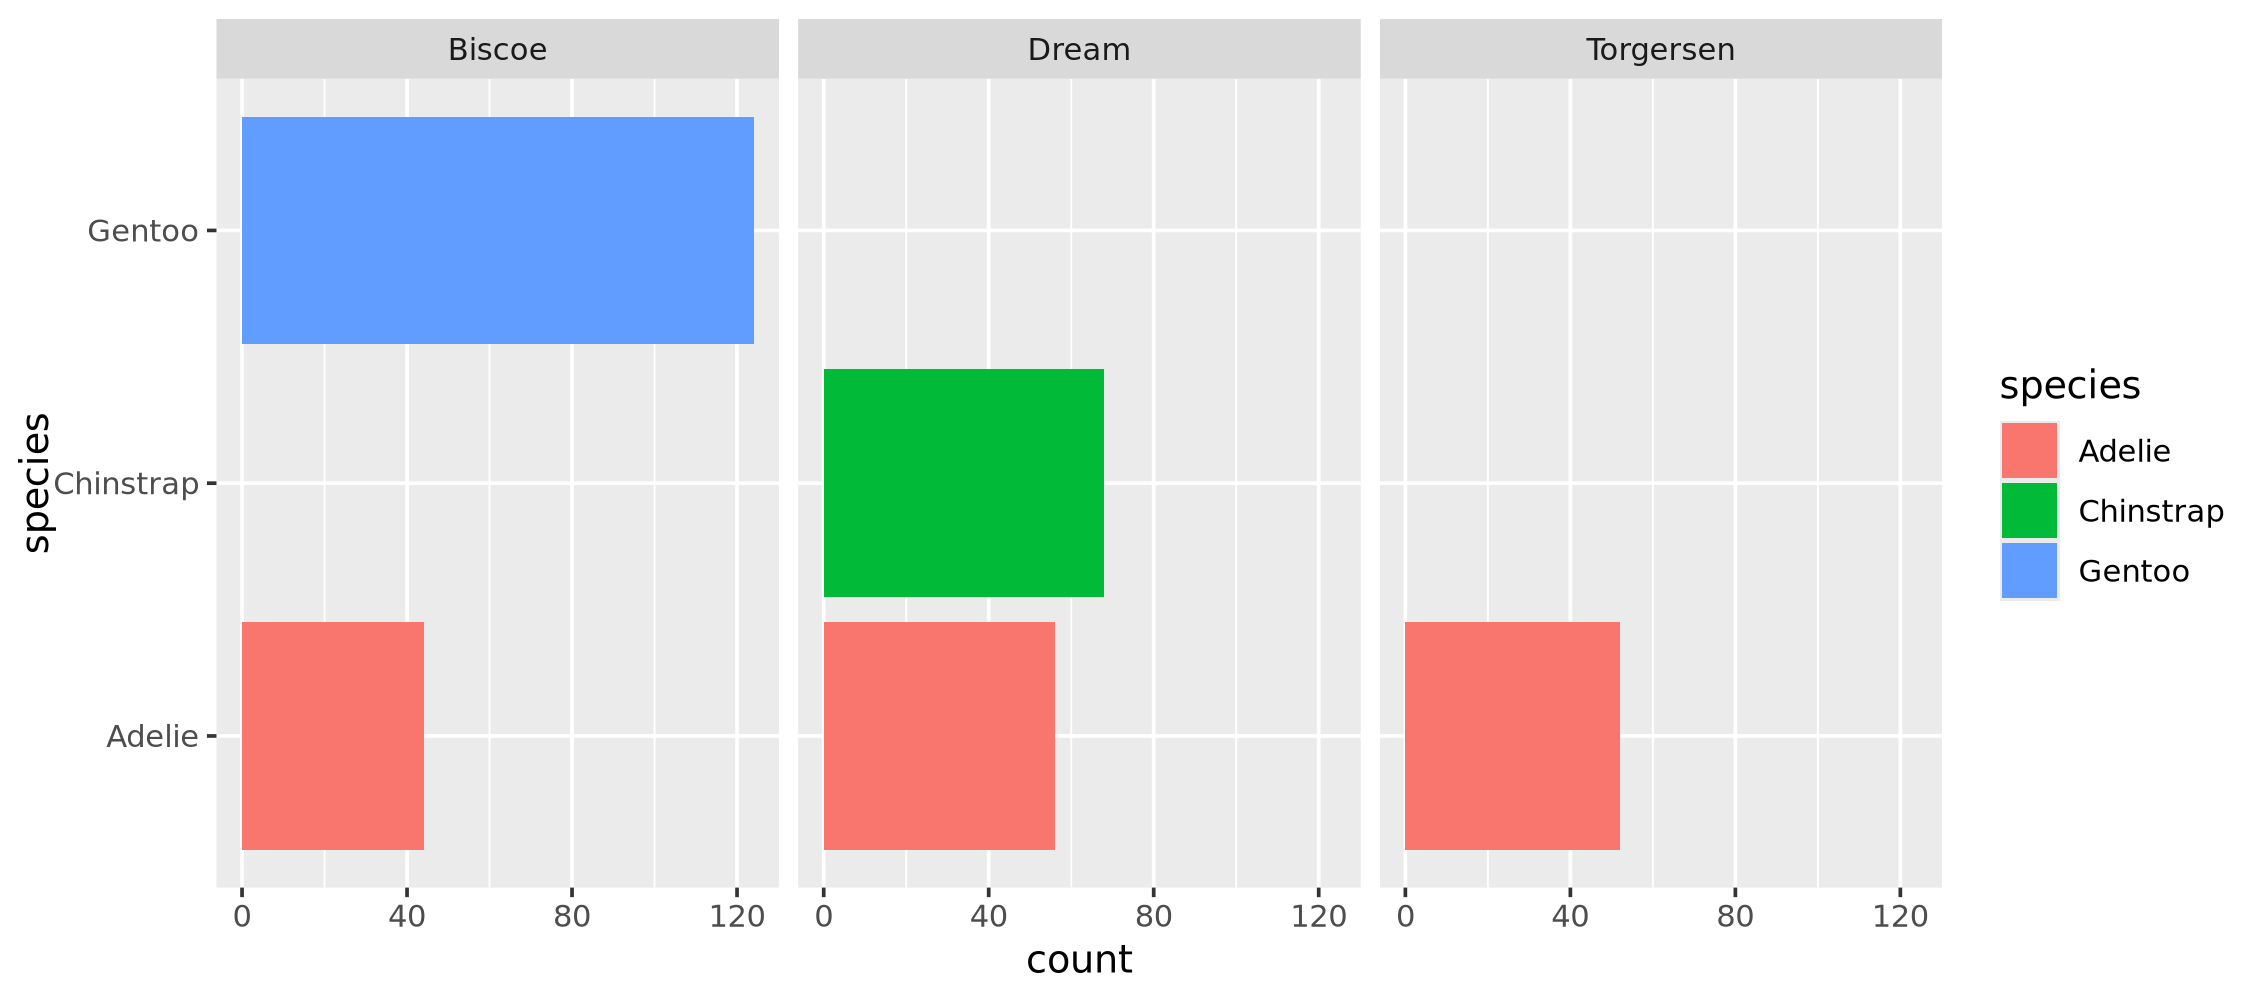

In [4]:
options(repr.plot.width = 9, repr.plot.height = 4)

ggplot(data = penguins, mapping = aes(y = species)) +
    geom_bar(aes(fill = species)) +
    facet_wrap(~island, ncol = 3)

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

Adelie is observed in all three islands.

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

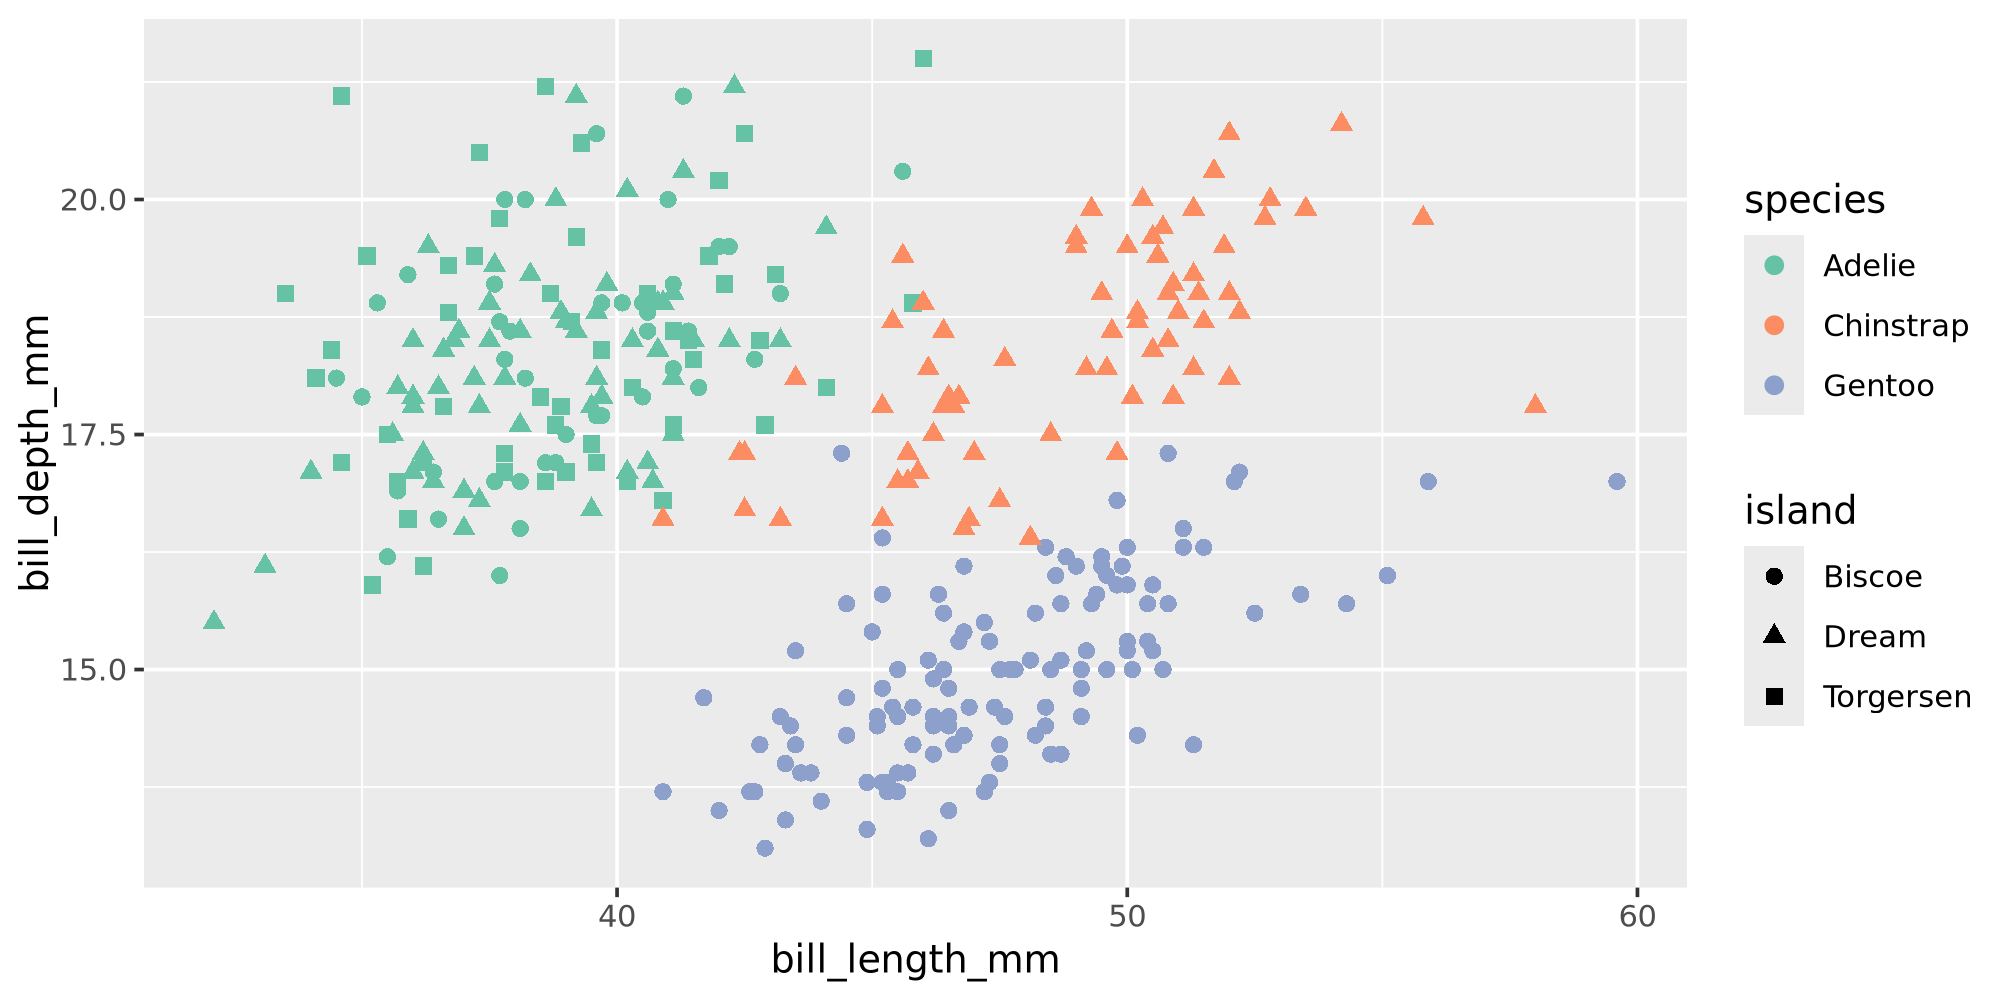

In [5]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(data = penguins, mapping = aes(x = bill_length_mm, 
                                      y = bill_depth_mm,
                                      color = species,
                                      shape = island)) + 
    geom_point(na.rm = TRUE, size = 2) +
    scale_color_brewer(palette = 'Set2')

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


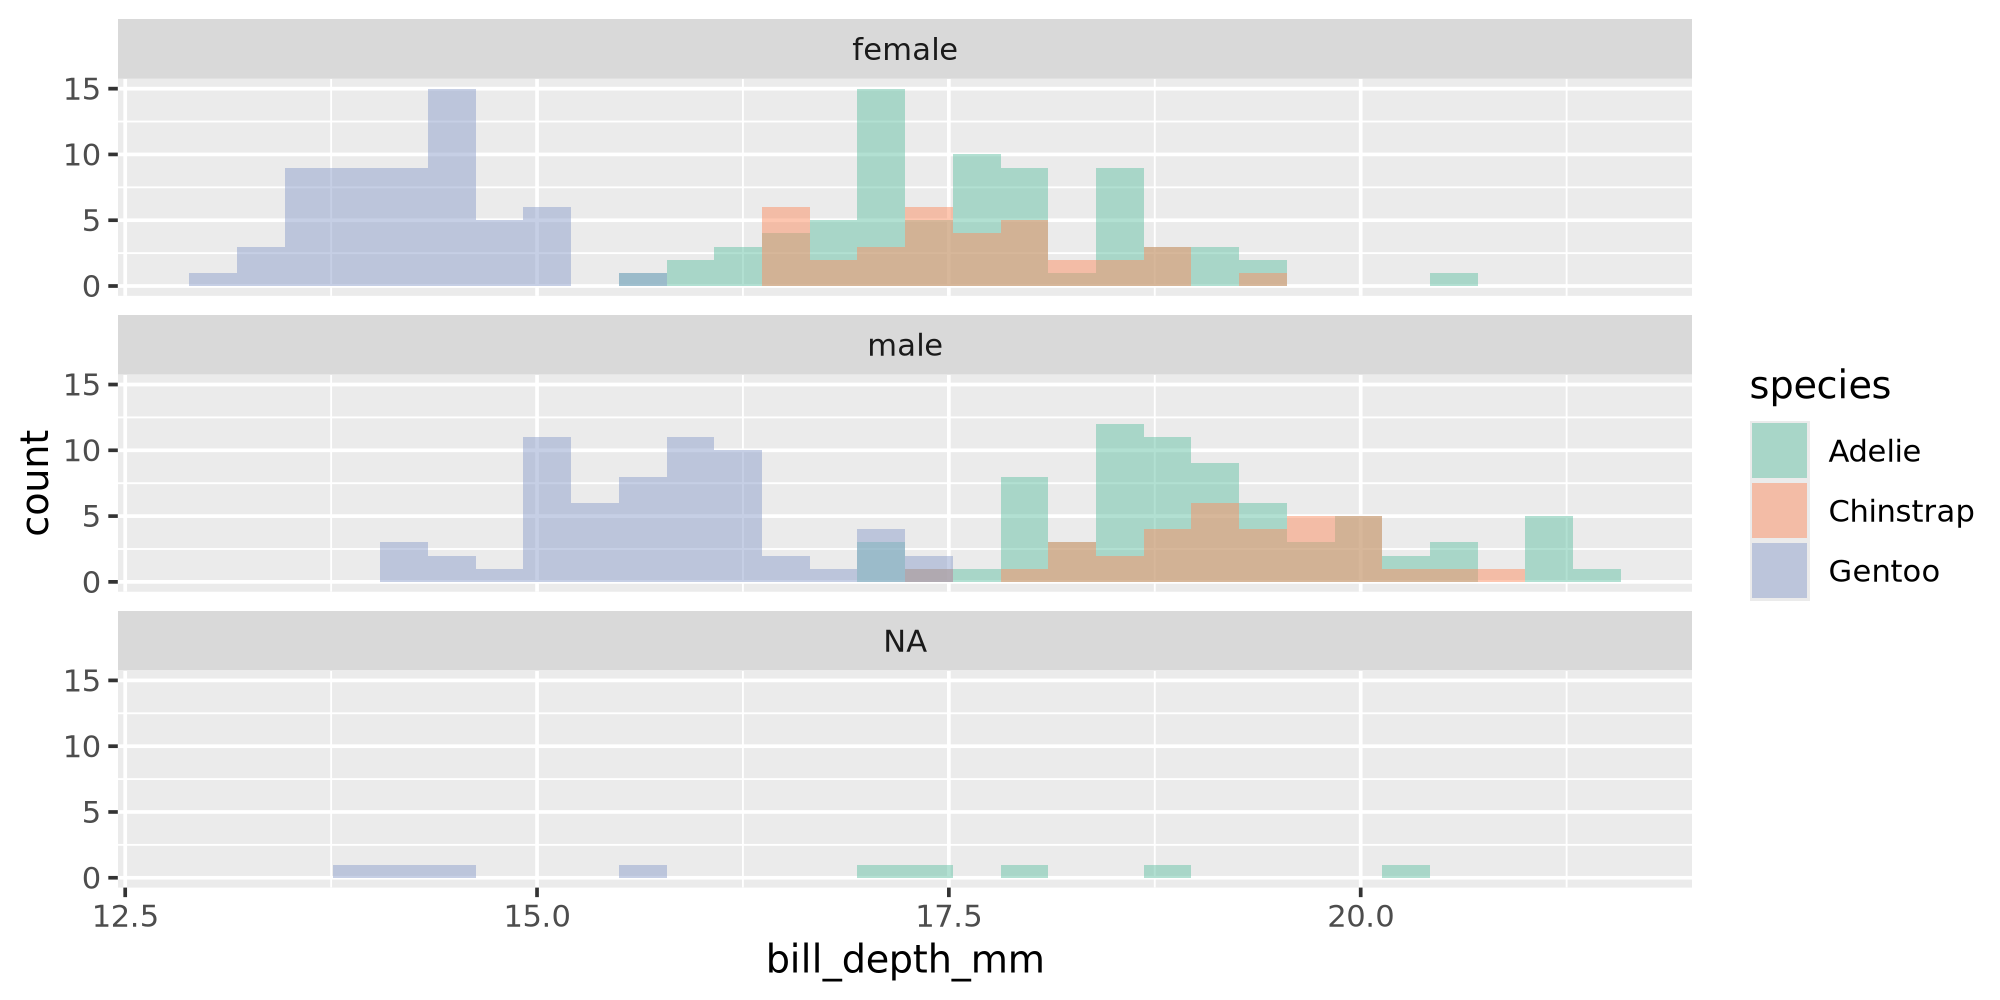

In [6]:
ggplot(penguins, aes(x = bill_depth_mm)) + 
    geom_histogram(na.rm = T, position = "identity", alpha=0.5, aes(fill = species)) +
    facet_wrap(~sex, ncol = 1) +
    scale_fill_brewer(palette = 'Set2')

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

Without the condition position = "identity", geom_bar() uses default stat_count() which makes adjustment to the original values.

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [7]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [8]:
names(txhousing)

txhousing = data.frame(txhousing)
txhousing = txhousing[, !(names(txhousing) %in% c("inventory"))]

names(txhousing)

[1] "city"      "year"      "month"     "sales"     "volume"    "median"   
[7] "listings"  "inventory" "date"

[1] "city"     "year"     "month"    "sales"    "volume"   "median"   "listings"
[8] "date"

Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [27]:
dallas_sub = filter(txhousing, city == "Dallas" , (year == '2012' | year == '2013'))
dallas_sub |> head()

,city,year,month,sales,volume,median,listings,date
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dallas,2012,1,2555,509458081,150800,16721,2012.000
2,Dallas,2012,2,3085,634067291,157100,17173,2012.083
3,Dallas,2012,3,4068,898320563,167300,17433,2012.167
4,Dallas,2012,4,4291,983333297,168700,17632,2012.250
5,Dallas,2012,5,5004,1175419749,175100,17726,2012.333
6,Dallas,2012,6,5196,1209024869,177900,17587,2012.417


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [28]:
dallas_sub['prct_sold'] = ((dallas_sub['sales']/dallas_sub['listings']) * 100)
dallas_sub |> head()

,city,year,month,sales,volume,median,listings,date,prct_sold
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dallas,2012,1,2555,509458081,150800,16721,2012.000,15.28019
2,Dallas,2012,2,3085,634067291,157100,17173,2012.083,17.96425
3,Dallas,2012,3,4068,898320563,167300,17433,2012.167,23.33505
4,Dallas,2012,4,4291,983333297,168700,17632,2012.250,24.33643
5,Dallas,2012,5,5004,1175419749,175100,17726,2012.333,28.22972
6,Dallas,2012,6,5196,1209024869,177900,17587,2012.417,29.54455


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [29]:
# dallas_sub |> head()
dallas_summary <- dallas_sub %>% group_by(month) 
# month 8 has result NA after mean(), so added na.rm=TRUE
dallas_summary <- dallas_summary %>% summarise(prct_sold=mean(prct_sold, na.rm = TRUE))
names(dallas_summary)[names(dallas_summary)=='prct_sold'] <- 'average_prct_sold_each_month'
dallas_summary

month,average_prct_sold_each_month
<int>,<dbl>
1,20.54462
2,23.47328
3,32.24472
4,34.46954
5,38.20168
6,37.19150
7,37.13028
8,38.51543
9,31.77096


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [30]:
dallas_summary %>% slice_max(n=3, order_by = average_prct_sold_each_month)

month,average_prct_sold_each_month
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [31]:
txhousing |>
  filter(year == 2012 | year == 2013, city == "Dallas") |>
  mutate(prct_sold = sales/listings *100) |>
  group_by(month) |>
  summarize(mean_prct_sold = mean(prct_sold)) |>
  slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


My explaination of the code:  

From dataset 'txhouding', take the subset that includes data only from the city of Dallas in 2012 & 2013.
calculates the percentage of listings that were sold (sales/listings * 100).
Calculate the average percentage of listings that were sold in Dallas in each month of the year
Use slice_max to see the top 3 months with the greatest average percentage of listings sold